# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [190]:
# Your code here - load the dataset
import numpy as np  
import pandas as pd  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.model_selection import train_test_split


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [191]:
# Your code here
ames = pd.read_csv("ames.csv", index_col=0)
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [192]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis=1)
ames.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [193]:
# Your code here - continuous numeric predictor
X_cnp = ames["1stFlrSF"]

### Discrete Numeric Predictor

In [194]:
# Your code here - discrete numeric predictor
X_dnp = ames["YearBuilt"]

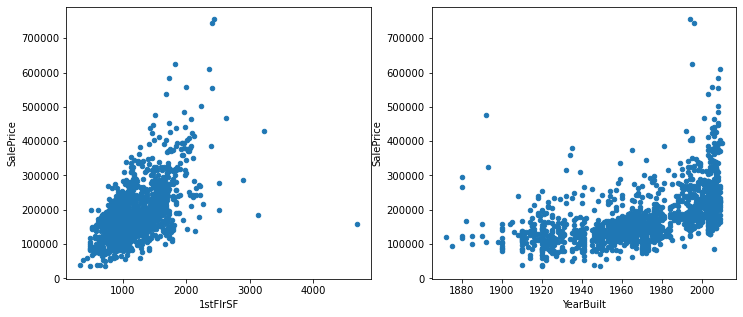

In [195]:
 # visualize the relationship between numeric predictors and SalePrice 
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ames.plot.scatter(x="1stFlrSF", y="SalePrice", ax=ax1)
ames.plot.scatter(x="YearBuilt", y="SalePrice", ax=ax2);

### String Categorical Predictor

In [196]:
# Your code here - string categorical predictor
X_scp = ames["LotShape"] 

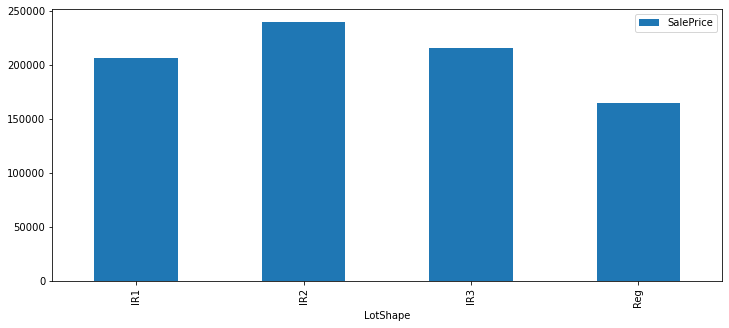

In [197]:
fig, ax = plt.subplots(figsize=(12,5))
ames.groupby("LotShape").mean('SalePrice').plot.bar(y='SalePrice', ax=ax);

### Discrete Categorical Predictor

In [198]:
# Your code here - discrete categorical predictor
X_dcp = ames["OverallQual"]


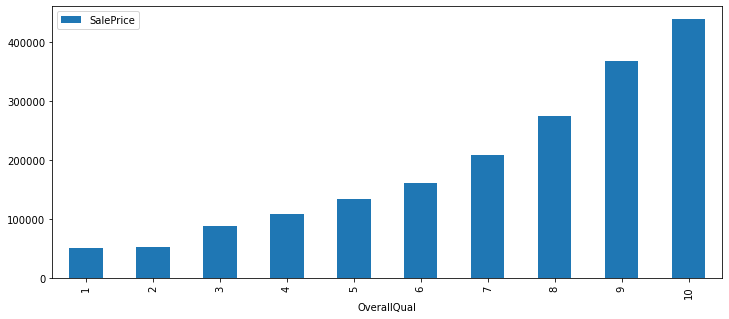

In [199]:
fig, ax = plt.subplots(figsize=(12,5))
ames.groupby("OverallQual").mean('SalePrice').plot.bar(y='SalePrice', ax=ax);

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [200]:
# Your answer here - which category or categories were dropped?
"""
Discrete Numeric Predictor category was dropped
"""

'\nDiscrete Numeric Predictor category was dropped\n'

In [201]:
# Your code here - prepare X and y, including one-hot encoding
ames_3p = ames[["1stFlrSF", "LotShape", "OverallQual", "SalePrice"]]

In [202]:
y = ames_3p["SalePrice"]
X = ames_3p[["1stFlrSF", "LotShape", "OverallQual"]]
X

,1stFlrSF,LotShape,OverallQual
Id,,,
1,856,Reg,7
2,1262,Reg,6
3,920,IR1,7
4,961,IR1,7
5,1145,IR1,8
...,...,...,...
1456,953,Reg,6
1457,2073,Reg,6
1458,1188,Reg,7


In [203]:
X = pd.get_dummies(X, columns=["LotShape", "OverallQual"], drop_first=True, dtype=int)
X

,1stFlrSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,,,
1,856,0,0,1,0,0,0,0,0,1,0,0,0
2,1262,0,0,1,0,0,0,0,1,0,0,0,0
3,920,0,0,0,0,0,0,0,0,1,0,0,0
4,961,0,0,0,0,0,0,0,0,1,0,0,0
5,1145,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,953,0,0,1,0,0,0,0,1,0,0,0,0
1457,2073,0,0,1,0,0,0,0,1,0,0,0,0
1458,1188,0,0,1,0,0,0,0,0,1,0,0,0


In [175]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     314.4
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:49:59   Log-Likelihood:                -17564.
No. Observations:                1460   AIC:                         3.516e+04
Df Residuals:                    1446   BIC:                         3.523e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.713e+04    2.9e+04      0.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

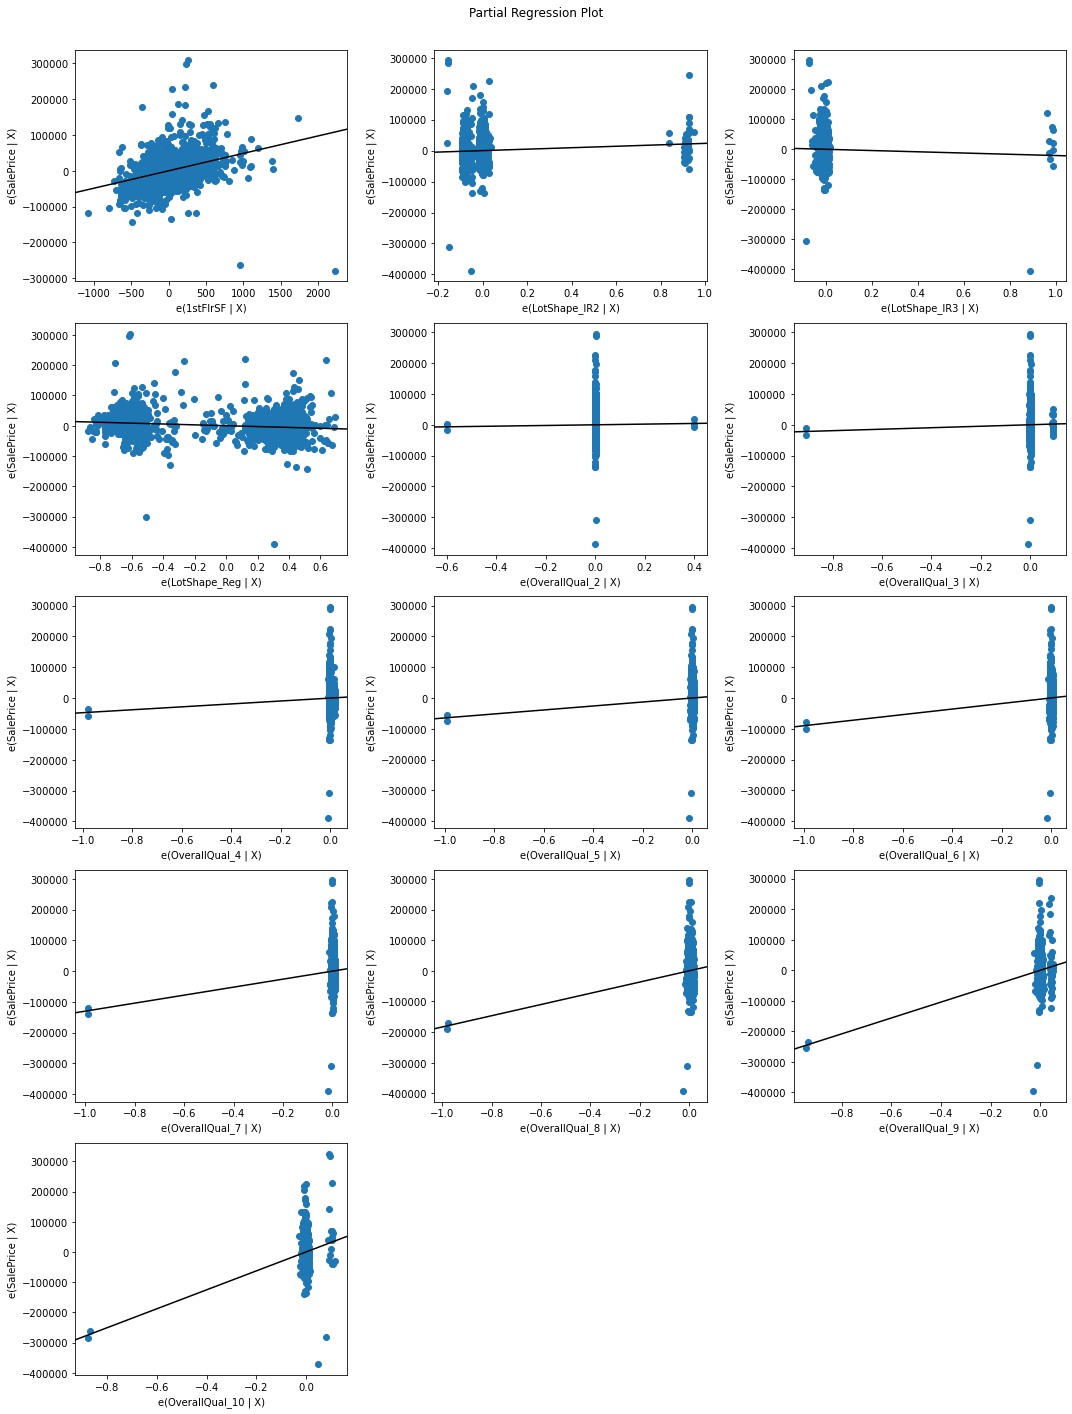

In [176]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,20))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(5,3),
    fig=fig)
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [177]:
# Your code here - calculate an error-based metric
# MAE and RMSE of the model
mae = results.resid.abs().sum()/len(y)
rmse = ((results.resid ** 2).sum()/len(y)) ** 0.5

print("MAE:", mae) 
print("RMSE:", rmse)

MAE: 27312.910267420655
RMSE: 40599.060048651656


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [178]:
#### My answer here
- The model explains about 73.9% of thr variance in SalesPrice
- The model is statistically significant overall, with an F-statistic p-value below 0.05) 
- For a house with 1stFlrSF of 0 (i.e. area of 0 SF), as well as a LotShape of LotShape_IR1, we would expect a SalesPrice of about 27130 USD 
- For each increase of 1 sq.ft in 1stFlrSF, we see an associated increase in SalesPrice of about 48.59
- Breaking down the LotShape and OverallQual :
-For OverallQual_2, OverallQual_3, OverallQual_4, at alpha 0.05 they are not statistically significant  
thieir 
- For LotShape_IR2 compared to LotShape_IR1, we see an associated increase in SalesPrice of about 23410
- For LotShape_IR3 compared to LotShape_IR1, we see an associated decrease in SalesPrice of about 20860
- For OverallQual_2, OverallQual_3, OverallQual_4, at alpha 0.05 they are not statistically significant  
- For OverallQual_5 compared to OverallQual_1, we see an associated increase in SalesPrice of about 64550
- For OverallQual_6 compared to OverallQual_1, we see an associated increase in SalesPrice of about 90140
- For OverallQual_7 compared to OverallQual_1, we see an associated increase in SalesPrice of about 129900
- For OverallQual_8 compared to OverallQual_1, we see an associated increase in SalesPrice of about 183000
- For OverallQual_9 compared to OverallQual_1, we see an associated increase in SalesPrice of about 260100
- For OverallQual_10 compared to OverallQual_1, we see an associated increase in SalesPrice of about 313100
- The model is off by about 40599 SalesPrice in an average prediction (RMSE 40599.060048651656)

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [179]:
# Your code here
from sklearn.preprocessing import OneHotEncoder 
import sklearn


ohe = OneHotEncoder(drop="first", sparse=False) 

In [180]:
data_cat = ames[["LotShape"]].copy() 
data_cat

,LotShape
Id,
1,Reg
2,Reg
3,IR1
4,IR1
5,IR1
...,...
1456,Reg
1457,Reg
1458,Reg


In [181]:
ohe.fit(data_cat) 
ohe.transform(data_cat)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [183]:
data_cat_ohe = pd.DataFrame(
    data=ohe.transform(data_cat),
    columns=[f"LotShape_{cat}" for cat in ohe.categories_[0][1:]]
)
data_cat_ohe.index = range(1, len(data_cat_ohe) + 1)
data_cat_ohe


,LotShape_IR2,LotShape_IR3,LotShape_Reg
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
...,...,...,...
1456,0.0,0.0,1.0
1457,0.0,0.0,1.0
1458,0.0,0.0,1.0
1459,0.0,0.0,1.0


In [184]:
data2_cat = ames[["OverallQual"]].copy() 
data2_cat

,OverallQual
Id,
1,7
2,6
3,7
4,7
5,8
...,...
1456,6
1457,6
1458,7


In [185]:
ohe.fit(data2_cat) 
ohe.transform(data2_cat)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [186]:
data2_cat_ohe = pd.DataFrame(
    data=ohe.transform(data2_cat),
    columns=[f"OverallQual_{cat}" for cat in ohe.categories_[0][1:]]
)
data2_cat_ohe.index = range(1, len(data2_cat_ohe) + 1)
data2_cat_ohe

,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1456,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [187]:
X_sklearn = pd.concat([ames[["1stFlrSF"]], data_cat_ohe, data2_cat_ohe], axis=1)
X_sklearn
X_sklearn.index = range(1, len(X_sklearn) + 1)
X_sklearn

,1stFlrSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
1,856,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1262,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,2073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,1188,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1459,1078,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [189]:
model_2 = sm.OLS(y, sm.add_constant(X_sklearn))
results_2 = model_2.fit()

print(results.params)
print(results_2.params)

const              27127.860698
1stFlrSF              48.594214
LotShape_IR2       23409.766729
LotShape_IR3      -20858.618542
LotShape_Reg      -14115.357969
OverallQual_2      10929.544220
OverallQual_3      23994.104957
OverallQual_4      47319.169837
OverallQual_5      64549.946406
OverallQual_6      90138.303674
OverallQual_7     129923.956924
OverallQual_8     183039.435465
OverallQual_9     260144.103824
OverallQual_10    313107.193991
dtype: float64
const              27127.860698
1stFlrSF              48.594214
LotShape_IR2       23409.766729
LotShape_IR3      -20858.618542
LotShape_Reg      -14115.357969
OverallQual_2      10929.544220
OverallQual_3      23994.104957
OverallQual_4      47319.169837
OverallQual_5      64549.946406
OverallQual_6      90138.303674
OverallQual_7     129923.956924
OverallQual_8     183039.435465
OverallQual_9     260144.103824
OverallQual_10    313107.193991
dtype: float64


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.